In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import git
import os

# Get git repository root
repo = git.Repo(".", search_parent_directories = True)
# Update notebook working dir to repository root
os.chdir(repo.working_tree_dir)

with open("python/plot_all_events.py", "r") as file:
    exec(file.read())

with open("python/action_potential_methods.py", "r") as file:
    exec(file.read())

# Detection of action potentials

In [27]:
samples = pd.read_csv("sample_sheet.csv")
sample = samples.iloc[1]
sample

SID              W1_C2
AnimalID            W1
CellName            C2
Region          S1_L23
Date        2019 12 09
Depth       265.898093
Count              270
Location         W1/C2
Cortex              S1
Layer              L23
Name: 1, dtype: object

In [28]:
data = pd.read_pickle(f"output/movement-s1-m1/{sample['AnimalID']}/{sample['CellName']}/vm/filter.pkl")
channels = data.ch_names

In [29]:
signal = data.get_data()[6, :]
time = data.times

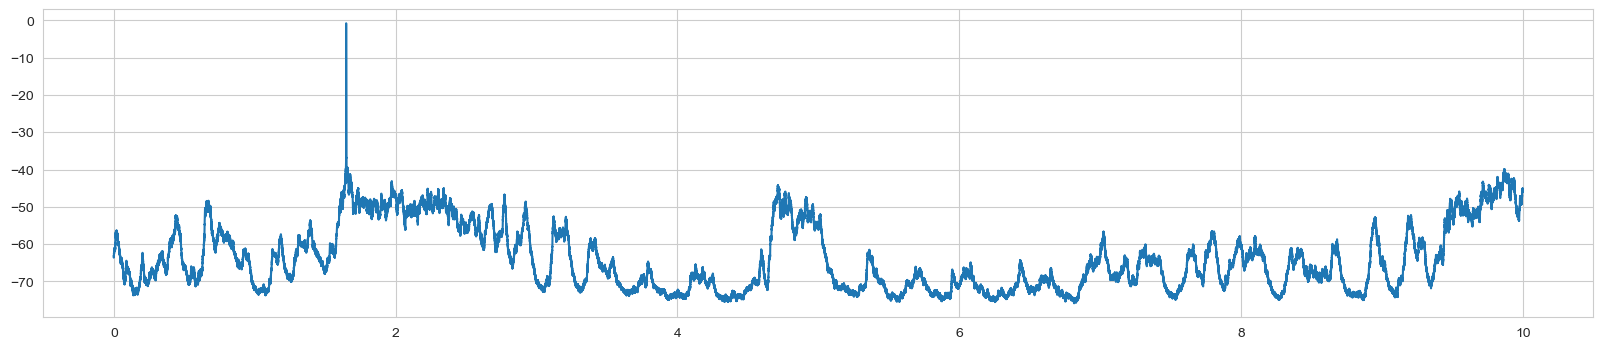

In [30]:
plt.figure(figsize = (20, 4))
plt.plot(time, signal)
plt.show()

In [31]:
differential = np.diff(signal)

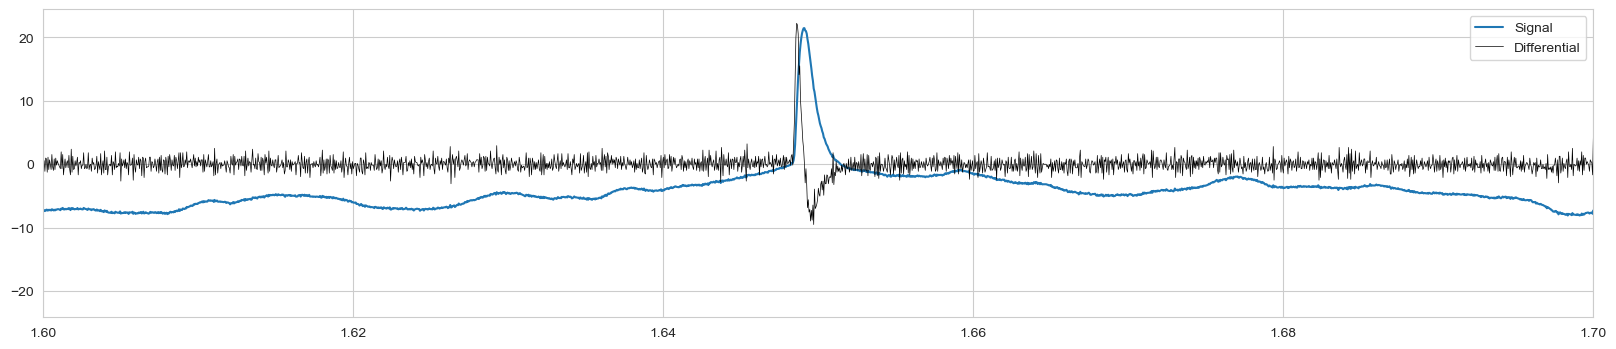

In [32]:
plt.figure(figsize = (20, 4))
plt.plot(time, ((signal - np.mean(signal)) / np.std(signal) - 3) * 5, label = "Signal")
plt.plot(time[1:], (differential - np.mean(differential)) / np.std(differential), linewidth = 0.5, c = "black", label = "Differential")
plt.xlim(1.6, 1.7)
plt.legend()
plt.show()

In [33]:
aps = find_ap(differential, time, threshold = 1.5)
ap = aps.iloc[0]

start = round(ap["EventStart"])
end = round(ap["EventEnd"])
startTime = round(ap["Start"], 2) - 0.05
endTime = round(ap["End"], 2) + 0.05

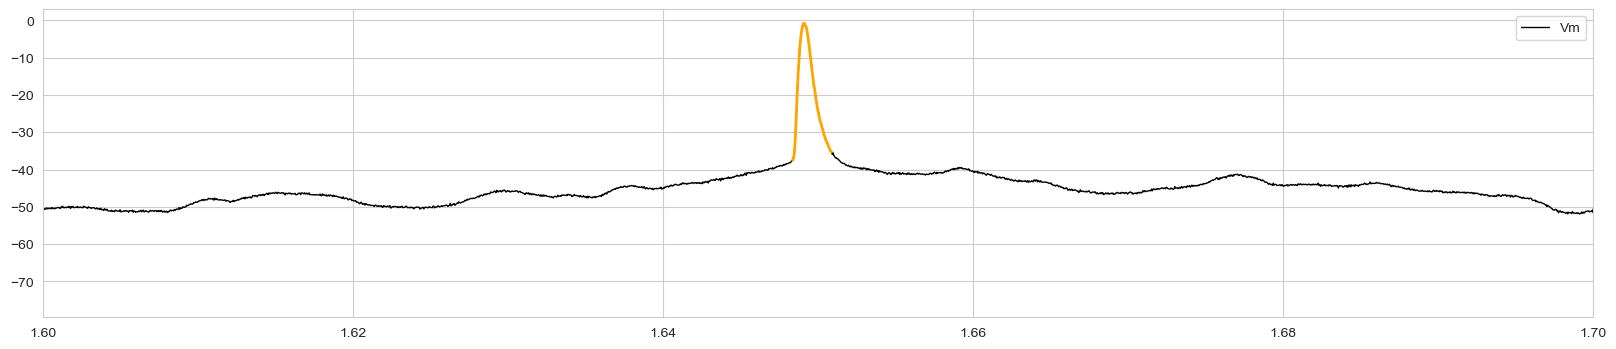

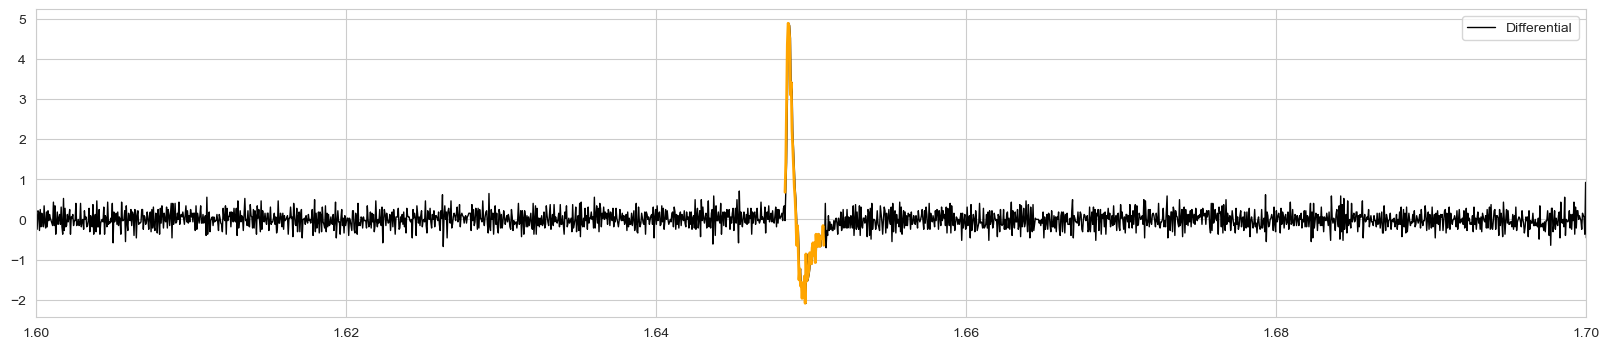

In [34]:
plt.figure(figsize = (20, 4))
plt.plot(time[:], signal, linewidth = 1, color = "black", label = "Vm")

plt.plot(time[start:end], signal[start:end], linewidth = 2, color = "orange")

plt.xlim(startTime, endTime)
plt.legend()
plt.show()


plt.figure(figsize = (20, 4))
plt.plot(time[1:], differential, linewidth = 1, c = "black", label = "Differential")

plt.plot(time[start:end], differential[start:end], linewidth = 2, color = "orange")

plt.xlim(startTime, endTime)
plt.legend()
plt.show()

## AP in all trials

In [35]:
aps = pd.read_csv(f"output/movement-s1-m1/{sample['AnimalID']}/{sample['CellName']}/action_potentials.csv")

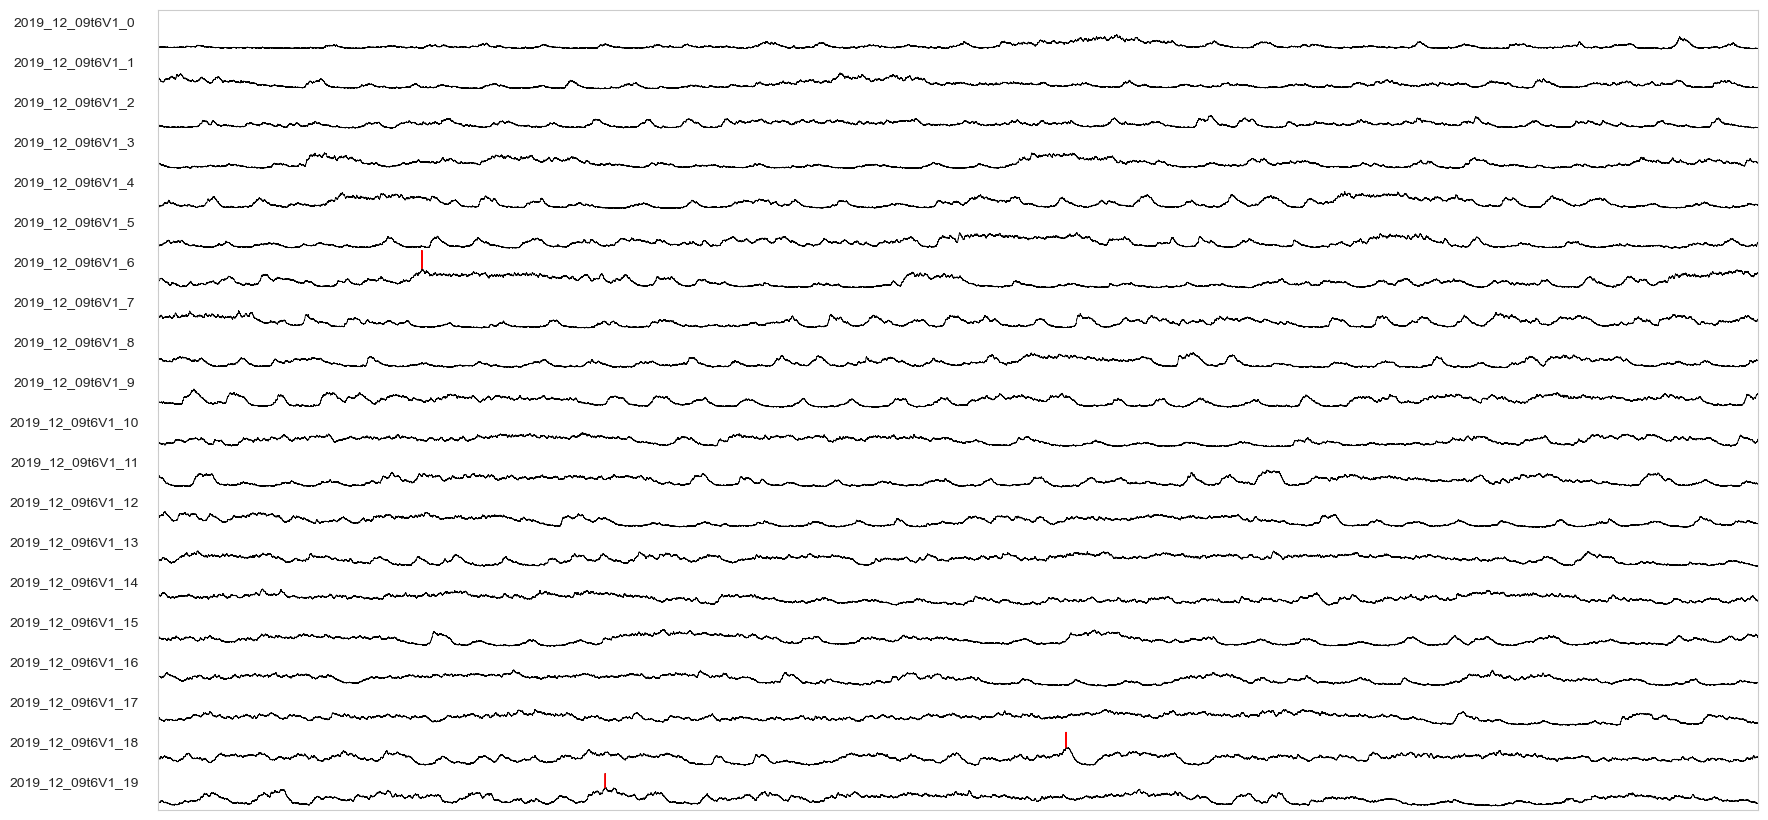

In [39]:
plot_all_events(data, channels = data.ch_names, movement = aps, limit = [-80, 0])